In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("airlines_delay.csv")

In [3]:
#airline delay dataset
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


Flight= Flight Id

Time= Time of departure  (Since there are 1440 minutes in 24 hrs, I assume that this is the number of minutes in 24 hrs, and the 1439.0 flights are 23:59.)

Length= Length of Flight

Airline= Airline Id

AirportFrom= Which airport the flight flew from

AirportTo= Which airport the flight flew to

DayOfWeek= Day of the week of the flight

Class= Delayed (1) or Not Delayed (0)




In [4]:
df.set_index('Flight',inplace=True)
df.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
Flight,,,,,,,
2313.0,1296.0,141.0,DL,ATL,HOU,1,0
6948.0,360.0,146.0,OO,COS,ORD,4,0
1247.0,1170.0,143.0,B6,BOS,CLT,3,0
31.0,1410.0,344.0,US,OGG,PHX,6,0
563.0,692.0,98.0,FL,BMI,ATL,4,0


In [5]:
df.dtypes

Time           float64
Length         float64
Airline         object
AirportFrom     object
AirportTo       object
DayOfWeek        int64
Class            int64
dtype: object

In [6]:
df["DayOfWeek"].value_counts()


4    91445
3    89746
5    85247
1    72769
2    71340
7    69879
6    58956
Name: DayOfWeek, dtype: int64

In [7]:
for col in df.columns:
    if col in ['Time','Length','Class']:
        next
    else:
        df[col] = df[col].astype('category')
df.dtypes

Time            float64
Length          float64
Airline        category
AirportFrom    category
AirportTo      category
DayOfWeek      category
Class             int64
dtype: object

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='DayOfWeek', ylabel='count'>

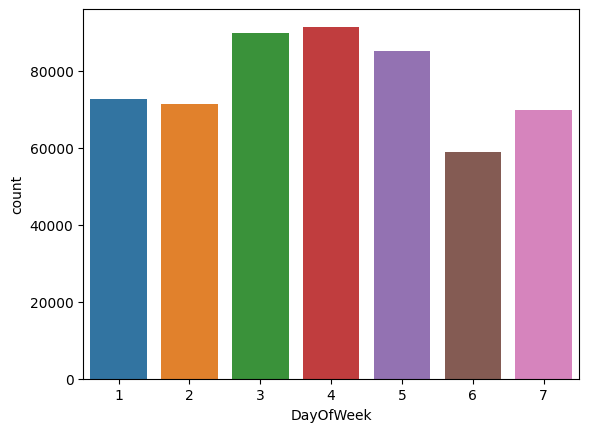

In [9]:
DayOfWeekOrder = list(range(1,8))
sns.countplot(x='DayOfWeek',data=df,order=DayOfWeekOrder)


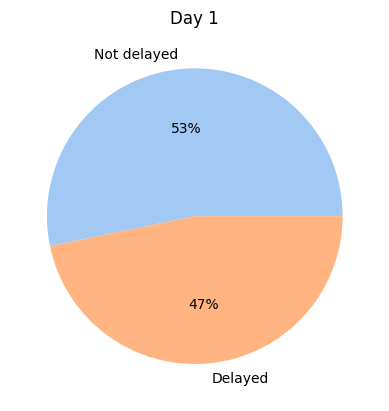

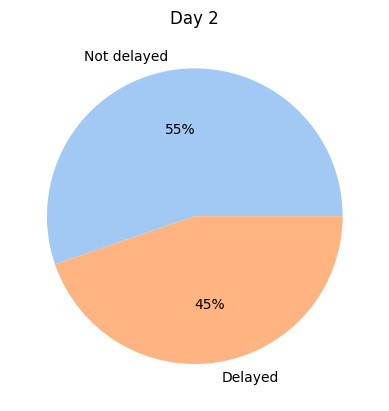

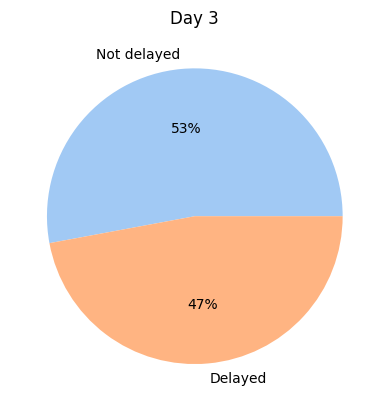

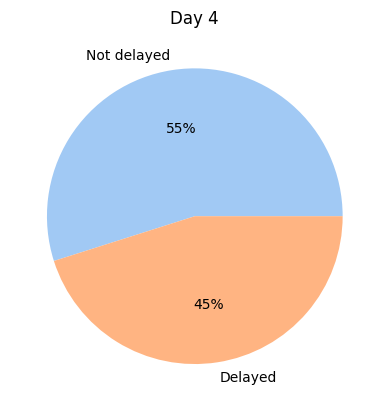

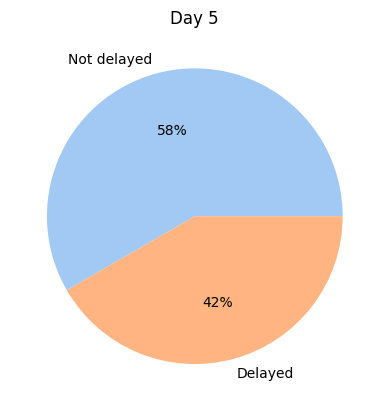

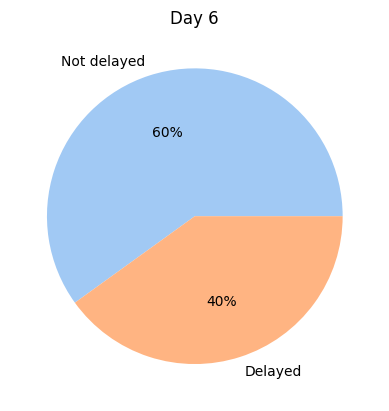

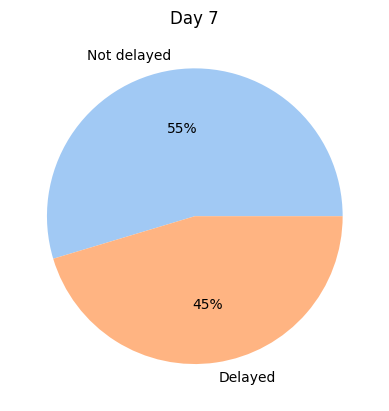

In [10]:
a = df.groupby(['DayOfWeek','Class']).count().unstack('Class')['Time']
for i in range(a.shape[0]):
    numOfFlights = a.iloc[i,0]+a.iloc[i,1]
    for j in [0,1]:
        a.iloc[i,j] = a.iloc[i,j]/numOfFlights

#set labels for pie chart
pieChartLabels = ['Not delayed','Delayed']
#define Seaborn color palette to use
myColors = sns.color_palette('pastel')[0:5]
#display pie charts for the whole week   
for i in range(1,8):
    b = a.iloc[i-1,:]
    #create pie chart
    plt.pie(b, labels = pieChartLabels, colors = myColors, autopct='%.0f%%')
    plt.title('Day ' + str(i))
    plt.show()

/tmp/ipykernel_10975/3364298640.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  c = df.groupby('Airline').sum()['Class'].sort_values(ascending=False)


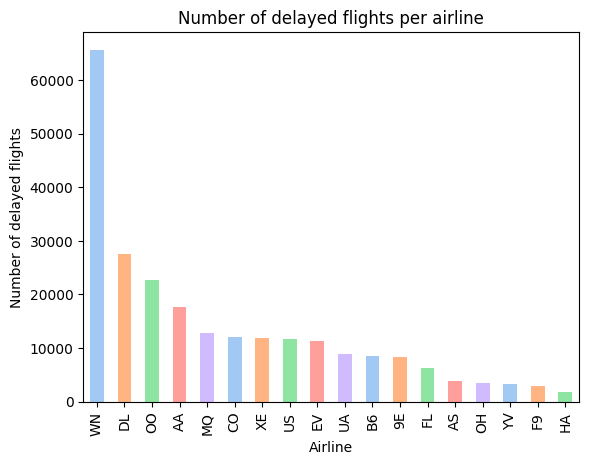

In [11]:
c = df.groupby('Airline').sum()['Class'].sort_values(ascending=False)
c.plot(kind='bar',color=myColors)
plt.ylabel('Number of delayed flights')
plt.title('Number of delayed flights per airline')
plt.show()

In [12]:
#We need to standardize(scaling(same unit)) the features: Time, and Length
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df[['Time','Length']] = sc.fit_transform(df[['Time','Length']])
df.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
Flight,,,,,,,
2313.0,0.899930,0.215267,DL,ATL,HOU,1,0
6948.0,0.244927,0.222901,OO,COS,ORD,4,0
1247.0,0.811756,0.218321,B6,BOS,CLT,3,0
31.0,0.979706,0.525191,US,OGG,PHX,6,0
563.0,0.477257,0.149618,FL,BMI,ATL,4,0


In [13]:
#We now need to encode our categorical features
categorical_features = ['Airline','AirportFrom','AirportTo','DayOfWeek']
df = pd.get_dummies(data=df,columns=categorical_features,drop_first=True)
df.head()

,Time,Length,Class,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,Airline_F9,...,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
Flight,,,,,,,,,,,,,,,,,,,,,
2313.0,0.899930,0.215267,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6948.0,0.244927,0.222901,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1247.0,0.811756,0.218321,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
31.0,0.979706,0.525191,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
563.0,0.477257,0.149618,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [14]:
#Let's move our Class column to the end of the DataFrame
transportedColumn = df.pop('Class')
df = pd.concat([df,transportedColumn],axis=1)
df.head()


,Time,Length,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,Airline_F9,Airline_FL,...,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Class
Flight,,,,,,,,,,,,,,,,,,,,,
2313.0,0.899930,0.215267,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6948.0,0.244927,0.222901,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1247.0,0.811756,0.218321,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
31.0,0.979706,0.525191,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
563.0,0.477257,0.149618,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [15]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [16]:
x

,Time,Length,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,Airline_F9,Airline_FL,...,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
Flight,,,,,,,,,,,,,,,,,,,,,
2313.0,0.899930,0.215267,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6948.0,0.244927,0.222901,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1247.0,0.811756,0.218321,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
31.0,0.979706,0.525191,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
563.0,0.477257,0.149618,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6973.0,0.363891,0.109924,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1264.0,0.384885,0.175573,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5209.0,0.571728,0.112977,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [17]:
y

Flight
2313.0    0
6948.0    0
1247.0    0
31.0      0
563.0     0
         ..
6973.0    1
1264.0    1
5209.0    1
607.0     1
6377.0    1
Name: Class, Length: 539382, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=30)

In [19]:
#import model and fit it to training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rf.fit(xtrain,ytrain);

In [20]:
print("The model's accuracy on the training set is: " + str(rf.score(xtrain,ytrain)*100)+ "%")
print("The model's accuracy on the test set is: " + str(rf.score(xtest,ytest)*100)+ "%")

The model's accuracy on the training set is: 82.47410393387133%
The model's accuracy on the test set is: 61.04440255847727%


model is overfitting

In [30]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 10, 200)
    max_depth = trial.suggest_int("max_depth", 3, 20)

    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    score = cross_val_score(clf,xtrain,ytrain, cv=5).mean()

    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

best_params = study.best_params

[I 2023-03-27 12:10:16,217] A new study created in memory with name: no-name-76b09bf8-cb6f-4760-bf00-69fb0d97f14b
[W 2023-03-27 12:12:38,587] Trial 0 failed with parameters: {'n_estimators': 134, 'max_depth': 7} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_10109/4069350777.py", line 10, in objective
    score = cross_val_score(clf,xtrain,ytrain, cv=5).mean()
  File "/usr/local/lib64/python3.9/site-packages/sklearn/model_selection/_validation.py", line 515, in cross_val_score
    cv_results = cross_validate(
  File "/usr/local/lib64/python3.9/site-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
    results = parallel(
  File "/usr/local/lib64/python3.9/site-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config

KeyboardInterrupt: 

In [32]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.5 MB/s eta 0:00:0000:0100:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 8.2 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 7.7 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 6.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 8.6 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 6.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.5 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 9.1 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.4 MB/s eta 0:00:00ta 0:00:01
  Preparing metadata (setup.py) ...

  DEPRECATION: jax is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  Running setup.py install for jax ... done


In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard

# Define your model
model = tf.keras.Sequential([...])

# Compile your model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Create a TensorBoard callback
tensorboard_callback = TensorBoard(log_dir="./logs")

# Train your model with the TensorBoard callback
model.fit(xtrain,ytrain, epochs=10, validation_data=(xtest,ytest), callbacks=[tensorboard_callback])